<a href="https://colab.research.google.com/github/dineshbabuvaddineni/Deep_Learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
myimg=image.load_img(r"/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/Cat or Dog_2.jpg",target_size=(250,250))

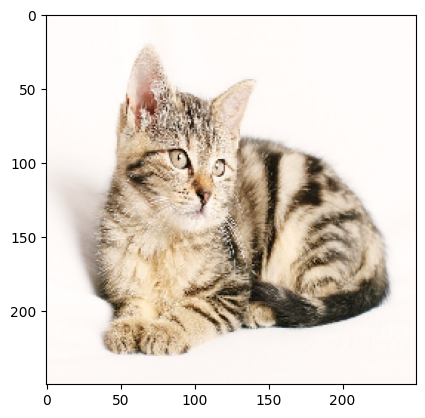

In [ ]:
plt.imshow(myimg)

In [ ]:
type(myimg)

PIL.Image.Image

In [ ]:
img=image.img_to_array(myimg)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [ ]:
img.shape

(250, 250, 3)

In [ ]:
input_img=img.reshape(1,250,250,3)

In [ ]:
input_img.shape

(1, 250, 250, 3)

In [ ]:
i=0
for output in datagen.flow(input_img,save_to_dir="/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/augmented_image",save_prefix="aug",save_format="jpg"):
  i=i+1

  if i==20:
    break


In [ ]:
# # python code for unzipping the data file
# import zipfile
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/cats-vs-dogs-training8000test2000.zip", "r")
# zip_ref.extractall("/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network")
# zip_ref.close()

In [ ]:
train_datagen=ImageDataGenerator(
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/dataset/training_set",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
)

Found 8000 images belonging to 2 classes.


In [ ]:
test_datagen=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
test_generator=test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/dataset/test_set",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/dataset/training_set",
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/dataset/test_set",
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# Min -Max Scaler - converts between 0 -1

def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model=Sequential()

In [ ]:
#first convolution
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#Third convolution
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#convert the data in 1D array
model.add(Flatten())

#addingfirst hidden layer with 128 neurons and relu activation function
model.add(Dense(128,activation='relu'))

#addingfirst second hidden layer with 64 neurons and relu activation function
model.add(Dense(64, activation='relu'))

#Here we have a 1 output since it is a binary classification.
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model=Sequential()

In [ ]:
#first convolution
model.add(Conv2D(24,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(150,150,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#second convolution
model.add(Conv2D(36,kernel_size=(3,3),padding="valid",activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#Third convolution
model.add(Conv2D(48,kernel_size=(3,3),padding="valid",activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#convert the data in 1D array
model.add(Flatten())

#addingfirst hidden layer with 128 neurons and relu activation function
model.add(Dense(64,activation='relu'))

#addingfirst second hidden layer with 64 neurons and relu activation function
model.add(Dense(32, activation='relu'))

#Here we have a 1 output since it is a binary classification.
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 24)      672       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 36)        7812      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 36)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 48)        15600     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 48)       

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator,epochs=1,validation_data=test_generator)

<ipython-input-34-2bae73bd2c0b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs=1,validation_data=test_generator)


134/134 [==============================] - 1573s 12s/step - loss: 0.6936 - accuracy: 0.5180 - val_loss: 0.6901 - val_accuracy: 0.5015
